In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


%matplotlib inline 

In [3]:
import earth_model

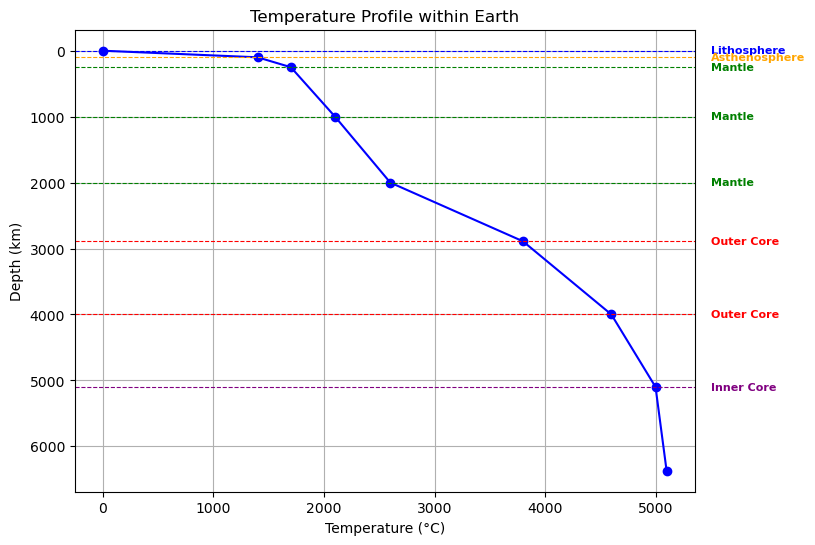

In [1]:
import matplotlib.pyplot as plt

depths = [0, 100, 250, 1000, 2000, 2890, 4000, 5100, 6370]  # Depth in kilometers
temperatures = [0, 1400, 1700, 2100, 2600, 3800, 4600, 5000, 5100]  # Temperature in Celsius

layers = ['Lithosphere', 'Asthenosphere', 'Mantle', 'Mantle', 'Mantle', 'Outer Core', 'Outer Core', 'Inner Core']
colors = ['blue', 'orange', 'green', 'green', 'green', 'red', 'red', 'purple']

plt.figure(figsize=(8, 6))
plt.plot(temperatures, depths, marker='o', linestyle='-', color='blue')

for depth, layer, color in zip(depths, layers, colors):
    plt.axhline(y=depth, color=color, linestyle='--', linewidth=0.8)
    plt.text(5500, depth, layer, ha='left', va='center', color=color, fontsize=8, weight='bold')

plt.title('Temperature Profile within Earth')
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (km)')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert radius for depth

plt.show()

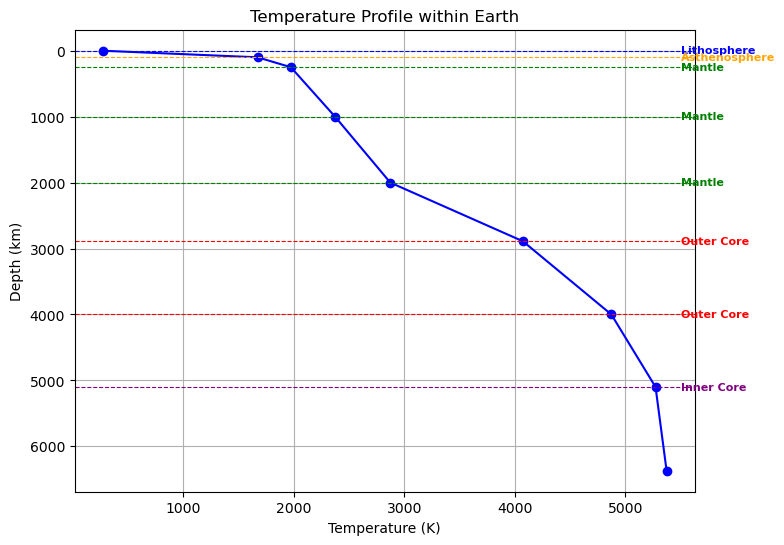

In [3]:
#in kelvin now

import matplotlib.pyplot as plt

depths = [0, 100, 250, 1000, 2000, 2890, 4000, 5100, 6370]  # Depth in kilometers
temperatures_celsius = [0, 1400, 1700, 2100, 2600, 3800, 4600, 5000, 5100]  # Temperature in Celsius

temperatures_kelvin = [temp + 273.15 for temp in temperatures_celsius]

layers = ['Lithosphere', 'Asthenosphere', 'Mantle', 'Mantle', 'Mantle', 'Outer Core', 'Outer Core', 'Inner Core']
colors = ['blue', 'orange', 'green', 'green', 'green', 'red', 'red', 'purple']

plt.figure(figsize=(8, 6))
plt.plot(temperatures_kelvin, depths, marker='o', linestyle='-', color='blue')

for depth, layer, color in zip(depths, layers, colors):
    plt.axhline(y=depth, color=color, linestyle='--', linewidth=0.8)
    plt.text(5500, depth, layer, ha='left', va='center', color=color, fontsize=8, weight='bold')

plt.title('Temperature Profile within Earth')
plt.xlabel('Temperature (K)')
plt.ylabel('Depth (km)')
plt.grid(True)
plt.gca().invert_yaxis()  

plt.show()

In [9]:
layers = [
    ("Lithosphere", (0, 100), (0, 1400), 14, 2.05),
    ("Asthenosphere", (100, 250), (1400, 1700), 2, 3.8),
    ("Mantle", (250, 1000), (1700, 2100), 0.53, 3.8),
    ("Mantle", (1000, 2000), (2100, 2600), 0.5, 6.1),
    ("Mantle", (2000, 2890), (2600, 3800), 1.35, 8.1),
    ("Outer Core", (2890, 4000), (3800, 4600), 0.72, 12.5),
    ("Outer Core", (4000, 5100), (4600, 5000), 0.36, 12.5),
    ("Inner Core", (5100, 6370), (5000, 5100), 0.079, 50)
]

# Calculate heat flow for each layer
heat_flows = []
for layer in layers:
    depth_range = layer[1][1] - layer[1][0]
    temperature_range = layer[2][1] - layer[2][0]
    temperature_gradient = layer[3]
    conductivity = layer[4]

    heat_flow = conductivity * temperature_gradient * depth_range
    heat_flows.append(heat_flow)

heat_flows_mw = [flow * 1000 for flow in heat_flows]
print(heat_flows_mw)

[2869999.9999999995, 1140000.0, 1510499.9999999998, 3050000.0, 9732150.0, 9990000.0, 4950000.0, 5016500.0]


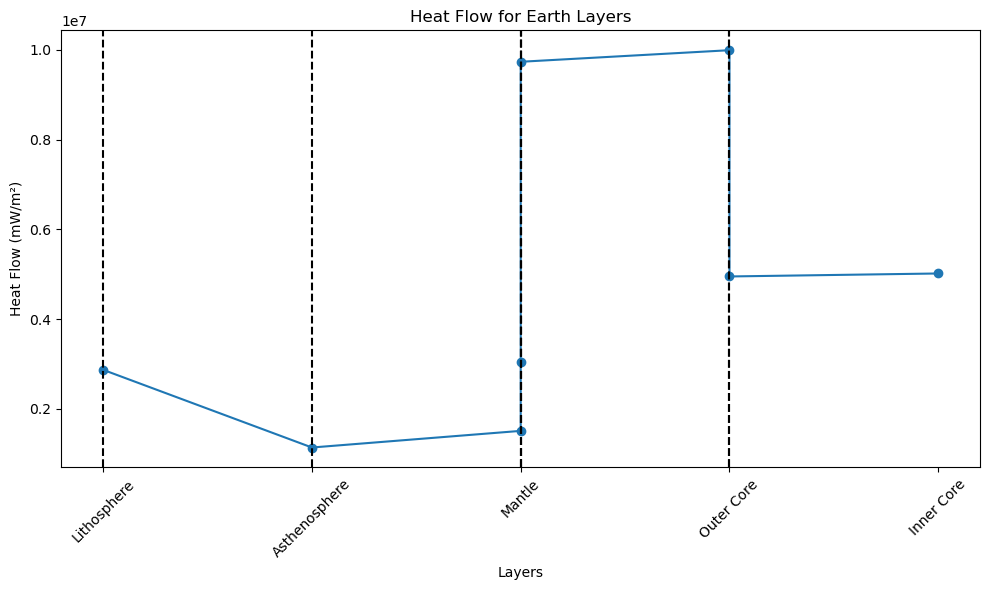

In [19]:
import matplotlib.pyplot as plt

boundaries = [(layer[0], layer[1][1]) for layer in layers[:-1]]  #  upper boundary of each layer except last

plt.figure(figsize=(10, 6))
plt.plot(layer_names, heat_flows_mw, marker='o', linestyle='-')
plt.xlabel('Layers')
plt.ylabel('Heat Flow (mW/m²)')
plt.title('Heat Flow for Earth Layers')
plt.xticks(rotation=45)

for layer_name, boundary in zip(layer_names, boundaries):
    plt.axvline(x=layer_name, color='black', linestyle='--')  # layers

plt.tight_layout()
plt.show()

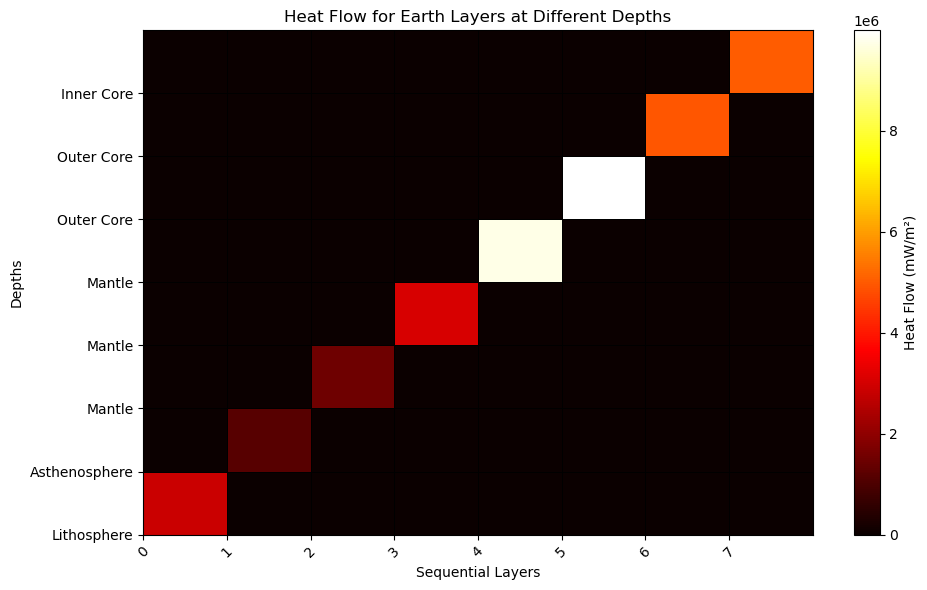

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Rest of your code...

# Create a matrix representing heat flows for different depths and layers
heat_flows_matrix = np.zeros((len(layer_names), len(heat_flows_mw)))
for i, heat_flow in enumerate(heat_flows_mw):
    heat_flows_matrix[i, i] = heat_flow

plt.figure(figsize=(10, 6))
plt.pcolormesh(heat_flows_matrix, cmap='hot', edgecolors='k', linewidths=0.5)  # Adding black edges to differentiate layers
plt.colorbar(label='Heat Flow (mW/m²)')

# For x-axis, just using sequential integers to represent layers
plt.xlabel('Sequential Layers')
plt.ylabel('Depths')
plt.title('Heat Flow for Earth Layers at Different Depths')

# Setting y ticks with layer names
plt.xticks(ticks=np.arange(len(heat_flows_mw)), labels=np.arange(len(heat_flows_mw)), rotation=45)
plt.yticks(ticks=np.arange(len(layer_names)), labels=layer_names)

plt.tight_layout()
plt.show()


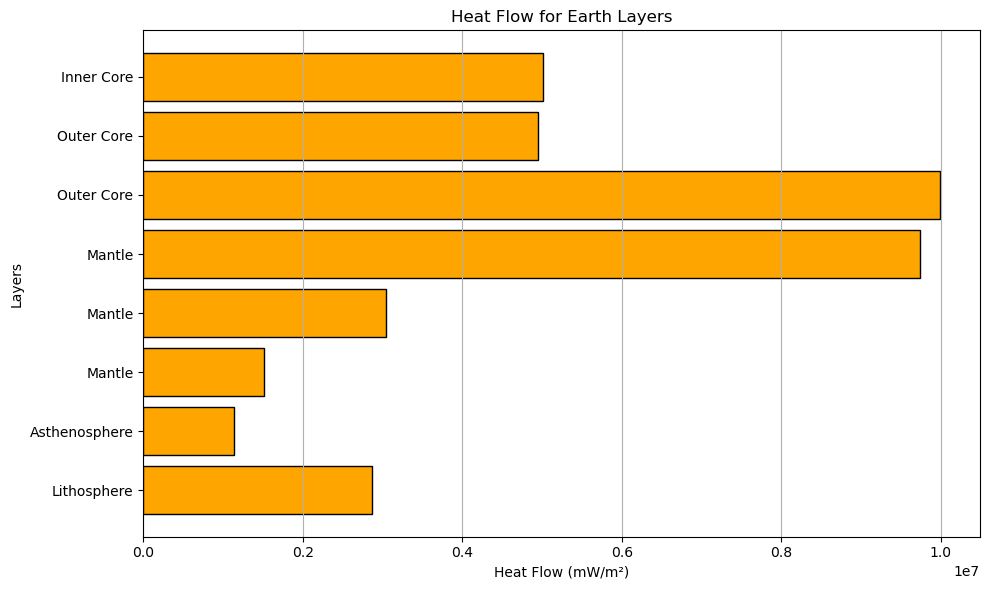

In [25]:
import matplotlib.pyplot as plt

# Rest of your code...

plt.figure(figsize=(10, 6))

# Plotting horizontal bars for each layer's heat flow
for i, heat_flow in enumerate(heat_flows_mw):
    plt.barh(i, heat_flow, color='orange', edgecolor='black')  # Adjust color and edgecolor as needed

plt.xlabel('Heat Flow (mW/m²)')
plt.ylabel('Layers')
plt.title('Heat Flow for Earth Layers')

# Setting y ticks with layer names
plt.yticks(ticks=np.arange(len(layer_names)), labels=layer_names)

plt.grid(axis='x')  # Adding grid lines along x-axis for reference

plt.tight_layout()
plt.show()
